# ☕ Coffee Sales Prediction Project

This project analyzes and predicts coffee sales revenue using machine learning.

- **Dataset used**: `coffee_sales.csv`
- **Model**: `XGBRegressor`
- **Goal**: Predict `money` (sales revenue) and analyze trends using time-based and categorical features


In [1]:
# Step 1: Imports
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error
from xgboost import XGBRegressor


In [3]:
# Step 2: Load Data
data = pd.read_csv("coffee_sales.csv")
data.columns = data.columns.str.strip().str.lower()
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [5]:
# Step 3: Data Cleaning & Preprocessing
data['money'] = data['money'].fillna(data['money'].median())
data['cash_type'] = data['cash_type'].fillna('Unknown')
data['coffee_name'] = data['coffee_name'].fillna('Unknown')
data.drop(columns=['card'], inplace=True, errors='ignore')
data['date'] = pd.to_datetime(data['date'])
data['datetime'] = pd.to_datetime(data['datetime'])

In [6]:
# Step 4: Feature Engineering
data['day_of_week'] = data['date'].dt.dayofweek
data['day_of_year'] = data['date'].dt.dayofyear
data['hour'] = data['datetime'].dt.hour

le = LabelEncoder()
data['cash_type'] = le.fit_transform(data['cash_type'])
data['coffee_name'] = le.fit_transform(data['coffee_name'])

In [7]:
# Step 5: Modeling
X = data[['cash_type', 'coffee_name', 'day_of_week', 'day_of_year', 'hour']]
y = data['money']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [8]:
# Step 6: Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape*100:.2f}%")
print(f"R^2 Score: {r2:.2f}")

MAE: 0.01
MSE: 0.00
RMSE: 0.07
MAPE: 0.04%
R^2 Score: 1.00


C:\Users\mvmak\AppData\Local\Temp\ipykernel_6480\290535123.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




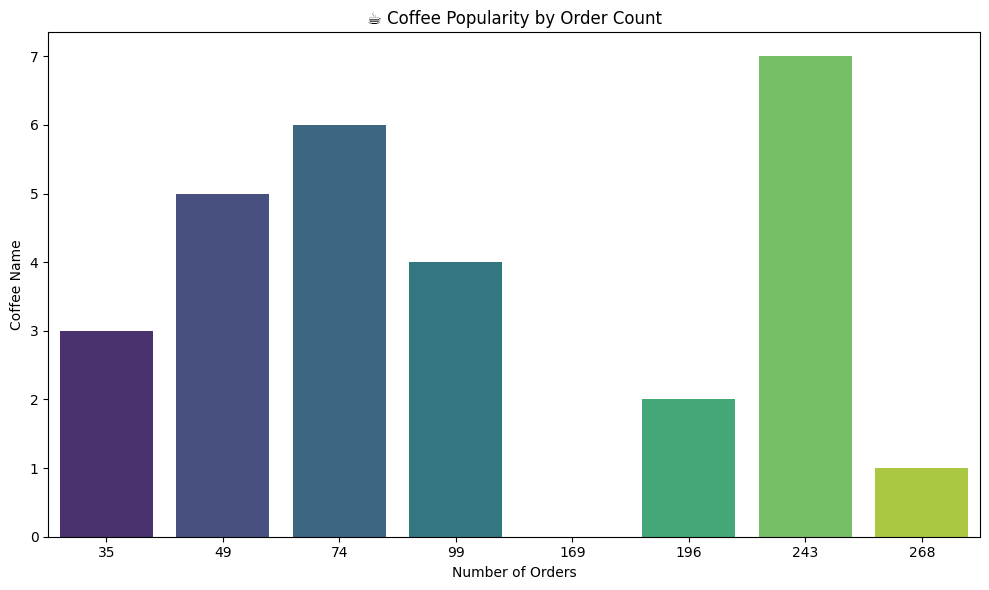

C:\Users\mvmak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 9200 (\N{ALARM CLOCK}) missing from current font.



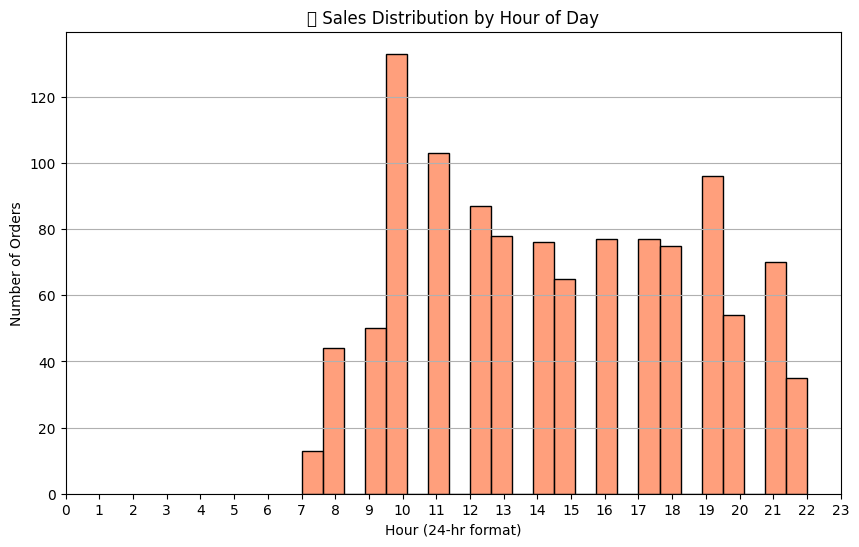

C:\Users\mvmak\AppData\Local\Temp\ipykernel_6480\290535123.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\mvmak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.



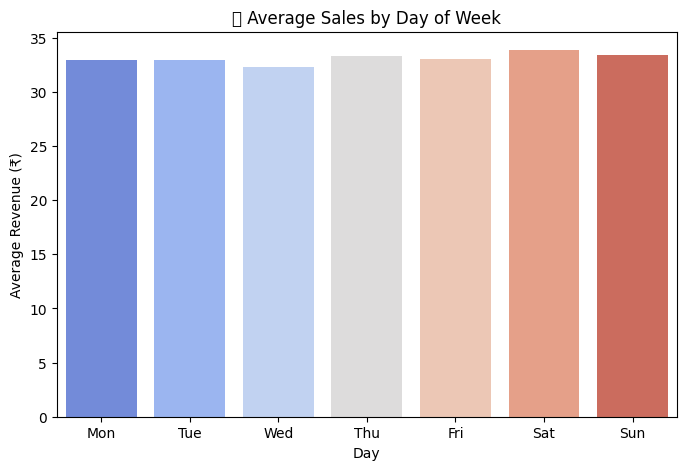

In [13]:
# visualizations

#Sales Count by Coffee Type
coffee_counts = data['coffee_name'].value_counts().reset_index()
coffee_counts.columns = ['coffee_name', 'count']

plt.figure(figsize=(10,6))
sns.barplot(data=coffee_counts, x='count', y='coffee_name', palette='viridis')
plt.title("☕ Coffee Popularity by Order Count")
plt.xlabel("Number of Orders")
plt.ylabel("Coffee Name")
plt.tight_layout()
plt.show()

#Hourly Sales Distribution
plt.figure(figsize=(10,6))
sns.histplot(data['hour'], bins=24, kde=False, color='coral')
plt.title("⏰ Sales Distribution by Hour of Day")
plt.xlabel("Hour (24-hr format)")
plt.ylabel("Number of Orders")
plt.xticks(range(0, 24))
plt.grid(True, axis='y')
plt.show()

#Sales by Day of the Week
dow_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
data['day_label'] = data['day_of_week'].map(dow_map)

weekday_avg = data.groupby('day_label')['money'].mean().reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

plt.figure(figsize=(8,5))
sns.barplot(x=weekday_avg.index, y=weekday_avg.values, palette='coolwarm')
plt.title("📊 Average Sales by Day of Week")
plt.ylabel("Average Revenue (₹)")
plt.xlabel("Day")
plt.show()


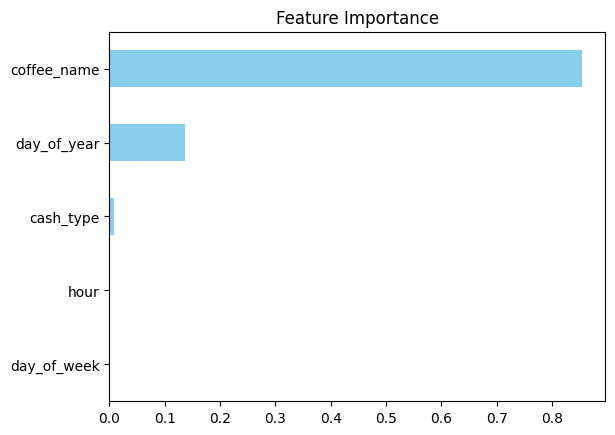

In [10]:
# Step 12: Feature Importance
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance")
plt.show()


In [14]:
# Step 13: Monthly Sales Trend
monthly_avg = data.groupby(data['date'].dt.to_period("M"))['money'].mean().reset_index()
monthly_avg['date'] = monthly_avg['date'].astype(str)
px.line(monthly_avg, x='date', y='money', title='Monthly Average Coffee Sales').show()